## Libraries and Packages

In [1]:
# Python 3 environment 
import os

# Machine Learning Classifiers
from lightgbm import LGBMRegressor, Booster, cv as lgbcv, Dataset as lgbDs
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# Unsupervised Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation Tools
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
 # for K-fold cross validation
import time
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Processing and Visualization Libraries
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from matplotlib.colors import ListedColormap
import graphviz
import zipfile
import random

import warnings
warnings.filterwarnings('ignore')

# New tools
import gzip
import m2cgen as m2c
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
# Allow Jupyter Notebook to display all output in the cell not just the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Max rows/columns to display

In [3]:
pd.options.display.max_rows = 200
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

In [4]:
# Unzip gdata
file118 = gzip.open('D:/Insight DS/Airbnb/2018/1/listings.csv.gz', 'rb')
file218 = gzip.open('D:/Insight DS/Airbnb/2018/2/listings.csv.gz', 'rb')
file318 = gzip.open('D:/Insight DS/Airbnb/2018/3/listings.csv.gz', 'rb')
file418 = gzip.open('D:/Insight DS/Airbnb/2018/4/listings.csv.gz', 'rb')
file518 = gzip.open('D:/Insight DS/Airbnb/2018/5/listings.csv.gz', 'rb')
file718 = gzip.open('D:/Insight DS/Airbnb/2018/7/listings.csv.gz', 'rb')
file818 = gzip.open('D:/Insight DS/Airbnb/2018/8/listings.csv.gz', 'rb')
file918 = gzip.open('D:/Insight DS/Airbnb/2018/9/listings.csv.gz', 'rb')
file1018 = gzip.open('D:/Insight DS/Airbnb/2018/10/listings.csv.gz', 'rb')
file1118 = gzip.open('D:/Insight DS/Airbnb/2018/11/listings.csv.gz', 'rb')
file1218 = gzip.open('D:/Insight DS/Airbnb/2018/12/listings.csv.gz', 'rb')

file119 = gzip.open('D:/Insight DS/Airbnb/2019/1/listings.csv.gz', 'rb')
file219 = gzip.open('D:/Insight DS/Airbnb/2019/2/listings.csv.gz', 'rb')
file319 = gzip.open('D:/Insight DS/Airbnb/2019/3/listings.csv.gz', 'rb')
file419 = gzip.open('D:/Insight DS/Airbnb/2019/4/listings.csv.gz', 'rb')
file519 = gzip.open('D:/Insight DS/Airbnb/2019/5/listings.csv.gz', 'rb')
file619 = gzip.open('D:/Insight DS/Airbnb/2019/6/listings.csv.gz', 'rb')
file719 = gzip.open('D:/Insight DS/Airbnb/2019/7/listings.csv.gz', 'rb')
file819 = gzip.open('D:/Insight DS/Airbnb/2019/8/listings.csv.gz', 'rb')

l_df118 = pd.read_csv(file118)
l_df218 = pd.read_csv(file218)
l_df318 = pd.read_csv(file318)
l_df418 = pd.read_csv(file418)
l_df518 = pd.read_csv(file518)
l_df718 = pd.read_csv(file718)
l_df818 = pd.read_csv(file818)
l_df918 = pd.read_csv(file918)
l_df1018 = pd.read_csv(file1018)
l_df1118 = pd.read_csv(file1118)
l_df1218 = pd.read_csv(file1218)

l_df119 = pd.read_csv(file119)
l_df219 = pd.read_csv(file219)
l_df319 = pd.read_csv(file319)
l_df419 = pd.read_csv(file419)
l_df519 = pd.read_csv(file519)
l_df619 = pd.read_csv(file619)
l_df719 = pd.read_csv(file719)
l_df819 = pd.read_csv(file819)

In [5]:
l_df118['month'], l_df118['year'] = 1, 2018
l_df218['month'], l_df218['year'] = 2, 2018
l_df318['month'], l_df318['year'] = 3, 2018
l_df418['month'], l_df418['year'] = 4, 2018
l_df518['month'], l_df518['year'] = 5, 2018
l_df718['month'], l_df718['year'] = 7, 2018
l_df818['month'], l_df818['year'] = 8, 2018
l_df918['month'], l_df918['year'] = 9, 2018
l_df1018['month'], l_df1018['year'] = 10, 2018
l_df1118['month'], l_df1118['year'] = 11, 2018
l_df1218['month'], l_df1218['year'] = 12, 2018

l_df119['month'], l_df119['year'] = 1, 2019
l_df219['month'], l_df219['year'] = 2, 2019
l_df319['month'], l_df319['year'] = 3, 2019
l_df419['month'], l_df419['year'] = 4, 2019
l_df519['month'], l_df519['year'] = 5, 2019
l_df619['month'], l_df619['year'] = 6, 2019
l_df719['month'], l_df719['year'] = 7, 2019
l_df819['month'], l_df819['year'] = 8, 2019

l_df = pd.concat([
    l_df118, l_df218, l_df318, l_df418, l_df518, l_df718, l_df818, l_df918,
    l_df1018, l_df1118, l_df1218, l_df119, l_df219, l_df319, l_df419, l_df519,
    l_df619, l_df719, l_df819
],
                 ignore_index=True)

file118.close()
file218.close()
file318.close()
file418.close()
file518.close()
file718.close()
file818.close()
file918.close()
file1018.close()
file1118.close()
file1218.close()

file119.close()
file219.close()
file319.close()
file419.close()
file519.close()
file619.close()
file719.close()
file819.close()

In [6]:
price_lo_bound = 20
price_hi_bound = 500

l_df[[
    'price', 'weekly_price', 'monthly_price', 'security_deposit',
    'cleaning_fee', 'extra_people'
]] = l_df[[
    'price', 'weekly_price', 'monthly_price', 'security_deposit',
    'cleaning_fee', 'extra_people'
]].replace('[\$,)]', '', regex=True).replace('[(]', '-',
                                             regex=True).astype(float)
df_new = l_df
df_new = df_new[(df_new['price'] >= price_lo_bound)
                & (df_new['price'] <= price_hi_bound)]
df_new = df_new[[
    'id', 'neighbourhood_cleansed', 'accommodates', 'price', 'weekly_price',
    'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people',
    'minimum_nights', 'maximum_nights', 'reviews_per_month', 'month', 'year'
]]

In [7]:
df_new = df_new[df_new['reviews_per_month'].notna()]
df_new['weekly_price'] = df_new['weekly_price'].fillna(df_new['price'] * 7)
df_new['monthly_price'] = df_new['monthly_price'].fillna(df_new['price'] * 30)
df_new['security_deposit'] = df_new['security_deposit'].fillna(
    df_new['price'] * 2.75)
df_new['cleaning_fee'] = df_new['cleaning_fee'].fillna(df_new['price'] * 0.67)
df_new = df_new[df_new['minimum_nights'] <= 365]

In [8]:
def occupancy_rate_est(data, alos, rr, coor):
    # alos: average length of stay
    # rr: review rate
    # coor: cap of occupancy rate

    data.loc[(data['minimum_nights'] <= alos) &
             (data['maximum_nights'] >= alos
              ), 'occupancy_%'] = data['reviews_per_month'] * alos / rr / 30

    data.loc[(data['maximum_nights'] <= alos), 'occupancy_%'] = data[
        'reviews_per_month'] * data['maximum_nights'] / rr / 30

    data.loc[(data['minimum_nights'] >= alos), 'occupancy_%'] = data[
        'reviews_per_month'] * data['minimum_nights'] / rr / 30

    data['occupancy_%'] = data['occupancy_%'].where(
        data['occupancy_%'] <= coor, coor)

    return data.head(10)

In [9]:
occupancy_rate_est(df_new, 5.5, 0.72, 1)

,id,neighbourhood_cleansed,accommodates,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,reviews_per_month,month,year,occupancy_%
0,8084285,Downtown/Civic Center,4,190.0,1330.0,5700.0,522.50,127.3,0.0,2,1125,0.28,1,2018,0.071296
2,13883766,Downtown/Civic Center,4,209.0,1463.0,6270.0,574.75,50.0,0.0,1,1125,0.25,1,2018,0.063657
3,5069984,Downtown/Civic Center,2,89.0,623.0,2670.0,244.75,25.0,0.0,1,21,2.66,1,2018,0.677315
4,10099733,Downtown/Civic Center,2,125.0,875.0,3750.0,343.75,50.0,0.0,5,1125,1.77,1,2018,0.450694
5,17192720,Downtown/Civic Center,3,110.0,770.0,3300.0,302.50,73.7,0.0,2,1125,0.99,1,2018,0.252083
6,8033975,Downtown/Civic Center,4,180.0,1260.0,5400.0,495.00,120.6,0.0,2,1125,0.07,1,2018,0.017824
7,7958349,Downtown/Civic Center,4,180.0,1260.0,5400.0,495.00,120.6,0.0,2,1125,0.36,1,2018,0.091667
8,20651312,Downtown/Civic Center,4,200.0,1400.0,6000.0,0.00,50.0,40.0,1,28,3.54,1,2018,0.901389
9,15972802,Downtown/Civic Center,3,110.0,770.0,3300.0,302.50,25.0,10.0,2,1125,0.23,1,2018,0.058565
11,11164246,Downtown/Civic Center,4,379.0,2653.0,11370.0,1042.25,69.0,0.0,2,6,0.43,1,2018,0.109491


In [10]:
df_new['weekly_discount'] = (df_new['price'] * 7 -
                             df_new['weekly_price']) / (df_new['price'] * 7)
df_new['weekly_discount'][df_new['weekly_discount'] < 0] = 0
df_new['monthly_discount'] = (df_new['price'] * 30 -
                              df_new['monthly_price']) / (df_new['price'] * 30)
df_new['monthly_discount'][df_new['monthly_discount'] < 0] = 0
df_new['revenue'] = df_new['price'] * df_new['occupancy_%']

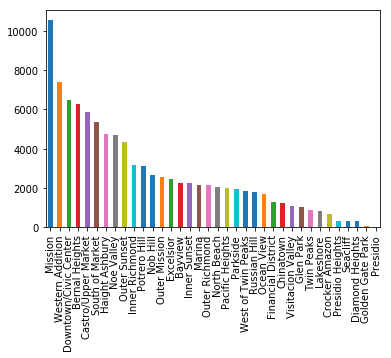

In [11]:
df_new['neighbourhood_cleansed'].value_counts().plot.bar()

In [12]:
class MultiColumnLabelEncoder(LabelEncoder):
    """
    Wraps sklearn LabelEncoder functionality for use on multiple columns of a
    pandas dataframe.

    """
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, dframe):
        """
        Fit label encoder to pandas columns.

        Access individual column classes via indexig `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            for idx, column in enumerate(self.columns):
                # fit LabelEncoder to get `classes_` for the column
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                # append this column's encoder
                self.all_encoders_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                self.all_encoders_[idx] = le
        return self

    def fit_transform(self, dframe):
        """
        Fit label encoder and return encoded labels.

        Access individual column classes via indexing
        `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`

        Access individual column encoded labels via indexing
        `self.all_labels_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            self.all_labels_ = np.ndarray(shape=self.columns.shape,
                                          dtype=object)
            for idx, column in enumerate(self.columns):
                # instantiate LabelEncoder
                le = LabelEncoder()
                # fit and transform labels in the column
                dframe.loc[:, column] =\
                    le.fit_transform(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                self.all_encoders_[idx] = le
                self.all_labels_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                dframe.loc[:, column] = le.fit_transform(
                    dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                   dtype=object))
                self.all_encoders_[idx] = le
        return dframe

    def transform(self, dframe):
        """
        Transform labels to normalized encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx].transform(
                    dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .transform(dframe.loc[:, column].values)
        return dframe.loc[:, self.columns].values

    def inverse_transform(self, dframe):
        """
        Transform labels back to original encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx]\
                    .inverse_transform(dframe.loc[:, column].values)
        return dframe

In [13]:
# find object columns
object_columns = df_new.iloc[:, :].select_dtypes(include=['object']).columns

# Multi-column label encoding
mcle = MultiColumnLabelEncoder(columns=object_columns)
df_go = mcle.fit_transform(df_new)

# consider month and year columns as objects too, while they don't need additional encoding
# object_columns = object_columns.union(['month', 'year'])

In [14]:
df_go[['price', 'occupancy_%', 'month', 'revenue']][df_go['year']>=2018].groupby(['month']).describe()

occupancy_%                                                              \
            count      mean       std       min       25%       50%  75%  max   
month                                                                           
1      10181.0     0.542694  0.355348  0.005093  0.208333  0.501620  1.0  1.0   
2      9727.0      0.561108  0.353582  0.005093  0.229167  0.518519  1.0  1.0   
3      9618.0      0.558150  0.355158  0.005093  0.222222  0.514815  1.0  1.0   
4      9853.0      0.558276  0.356745  0.005093  0.222222  0.516898  1.0  1.0   
5      9853.0      0.554712  0.358015  0.005093  0.213889  0.509259  1.0  1.0   
6      5741.0      0.546199  0.359328  0.005093  0.203704  0.499074  1.0  1.0   
7      10005.0     0.556557  0.360649  0.000000  0.208796  0.513889  1.0  1.0   
8      11152.0     0.552724  0.359116  0.005093  0.208333  0.509259  1.0  1.0   
9      5164.0      0.574063  0.357486  0.005093  0.231308  0.551273  1.0  1.0   
10     5401.0      0.572001  0.354854  0.005093  0.236111  0.547454  1.0  1.0   
11     5520.0      0.573828  0.354020  0.005093  0.236111  0.544907  1.0  1.0   
12     5453.0      0.561723  0.353501  0.005093  0.230556  0.521991  1.0  1.0   

         price                                                            \
         count        mean         std   min   25%    50%     75%    max   
month                                                                      
1      10181.0  172.356841  100.292372  25.0  99.0  147.0  220.00  500.0   
2      9727.0   173.292176  100.681970  25.0  99.0  149.0  225.00  500.0   
3      9618.0   172.746205  100.887780  25.0  99.0  147.0  222.75  500.0   
4      9853.0   172.974120  101.250073  25.0  99.0  148.0  225.00  500.0   
5      9853.0   174.152441  101.118380  25.0  99.0  149.0  225.00  500.0   
6      5741.0   172.656157  100.857742  28.0  99.0  148.0  225.00  500.0   
7      10005.0  175.150525  101.565416  25.0  99.0  150.0  225.00  500.0   
8      11152.0  172.423063  100.704421  25.0  99.0  149.0  224.00  500.0   
9      5164.0   172.633424  100.579760  20.0  99.0  149.0  220.00  500.0   
10     5401.0   173.534901  100.891480  25.0  99.0  149.0  220.00  500.0   
11     5520.0   173.094565  100.411603  28.0  99.0  149.0  225.00  500.0   
12     5453.0   171.087291  100.799903  26.0  99.0  145.0  219.00  500.0   

       revenue                                                        \
         count       mean        std       min        25%        50%   
month                                                                  
1      10181.0  84.520463  73.299692  0.483796  30.555556  65.796296   
2      9727.0   87.661242  74.022940  0.483796  33.573032  69.600463   
3      9618.0   86.819875  74.283498  0.483796  32.986111  68.059028   
4      9853.0   86.886233  74.837270  0.483796  32.694444  67.527778   
5      9853.0   86.673268  74.508077  0.483796  32.500000  67.731481   
6      5741.0   85.073528  74.457970  0.483796  30.694444  65.124074   
7      10005.0  87.490498  75.346456  0.000000  32.083333  68.671065   
8      11152.0  86.690487  75.666050  0.416667  30.807639  67.004167   
9      5164.0   90.454927  76.993370  0.725694  34.140625  70.682639   
10     5401.0   90.221023  76.020133  0.725694  34.722222  71.555556   
11     5520.0   90.454606  75.926618  0.725694  34.842882  72.278356   
12     5453.0   86.951634  73.784932  0.725694  33.038194  69.000000   

                          
              75%    max  
month                     
1      117.180556  500.0  
2      120.960648  500.0  
3      120.000000  500.0  
4      120.000000  500.0  
5      120.000000  500.0  
6      119.000000  500.0  
7      120.656250  500.0  
8      120.000000  500.0  
9      125.000000  500.0  
10     125.000000  500.0  
11     125.000000  500.0  
12     120.000000  500.0

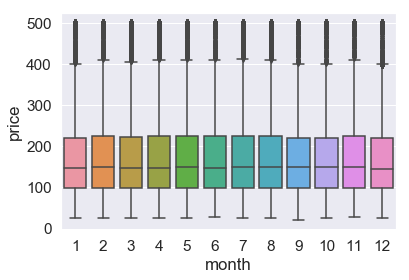

In [15]:
sns.set(font_scale=1.4)
sns.boxplot(x='month', y='price', data=df_go[(df_go['year']>=2018)]);

In [16]:
### Split Data
# Randomly split dataframe into train and test with a certain ratio
msk = np.random.rand(len(df_go)) < 0.8

train = df_go[msk]
train1 = train.copy()
train1['price'] = train1['price'] * 2
train1['occupancy_%'] = train1['occupancy_%'] * 0
train1['revenue'] = train1['price'] * train1['occupancy_%']
train = train.append(train1, ignore_index=True)

test = df_go[~msk]
test = test[test['price'] > 0]
test = test.drop_duplicates(subset='id', keep='first', inplace=False)

In [17]:
from sklearn.utils import shuffle
train = shuffle(train)
test = shuffle(test)

In [18]:
# Assign independent variables as x and the target variable as y
x_train = train.drop(['id','weekly_price', 'monthly_price', 'reviews_per_month','occupancy_%', 'revenue'], axis=1)
y_train = train['occupancy_%']
x_test = test.drop(['id','weekly_price', 'monthly_price', 'reviews_per_month','occupancy_%', 'revenue'], axis=1)
y_test = test['occupancy_%']

In [19]:
x_train.columns

Index(['neighbourhood_cleansed', 'accommodates', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights',
       'month', 'year', 'weekly_discount', 'monthly_discount'],
      dtype='object')

### Machine Learning Setups and Evaluations
#### LightGBM

In [20]:
# # Grid Search
# lgb = LGBMRegressor()
# n_estimators = [5,10,20,30,40,50,100,150,200,250,300,350,400,450,500]
# max_depth = [3,5,10, 15]
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
# # kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
# grid_search = GridSearchCV(lgb, param_grid, n_jobs=-1, scoring='r2', cv=5, verbose=1)
# grid_result = grid_search.fit(x_train, y_train, categorical_feature=list(object_columns.values))
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# # for mean, stdev, param in zip(means, stds, params):
# #     print("%f (%f) with: %r" % (mean, stdev, param))

In [21]:
# # Plot grid search results
# plt.figure(figsize=(12,6));
# scores = np.array(means).reshape(len(max_depth), len(n_estimators))
# stdevs = np.array(stds).reshape(len(max_depth), len(n_estimators))
# for i, value in enumerate(max_depth):
#     plt.plot(n_estimators, scores[i], label='max_depth = ' + str(value));
#     plt.fill_between(n_estimators, scores[i]-stdevs[i], scores[i]+stdevs[i], color='#888888', alpha=0.4);
# plt.xlim(0, max(n_estimators))
# plt.ylim(0.4, 1)
# plt.legend()
# plt.xlabel('n_estimators');
# plt.ylabel('mean of R-square');
# plt.savefig('n_estimators_vs_max_depth.png');


In [22]:
# Set general hyperparameters for all ML packages using the grid search result
max_depth = 12
n_estimator = 500
random_state = 110

In [23]:
%%time
# start = time.time()
lgb = LGBMRegressor(max_depth=max_depth,
                    n_estimators=n_estimator,
                    random_state=random_state,
                    learning_rate = 1)
lgb.fit(x_train,
        y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
        verbose = False,
        categorical_feature=list(object_columns.values))
# code = m2c.export_to_python(lgb); # try next line first
lgb.booster_.save_model('lgb_regressor.txt')
# from sklearn.externals import joblib
# joblib.dump(lgb, 'lgb.pkl')
# acc_lgb = accuracy_score(y_test, lgb.predict(x_test))

y_pred_lgb = lgb.predict(x_test)

# fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_lgb, drop_intermediate=False)
# auc_lgb = roc_auc_score(y_test, y_pred_lgb)
# end = time.time()
# time_lgb = end - start
# print("The entire evaluation takes", time_lgb, "s")

Wall time: 2.41 s


RMSE of occupany = 0.20685975451083166
R^2 of occupany = 0.6558181066319652
RMSE of monthly revenue = 1210.906745838133
R^2 of monthly revenue = 0.7101919419692309
Wall time: 102 ms


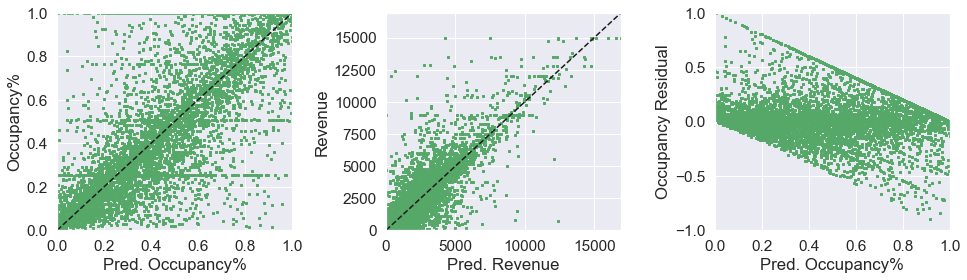

In [24]:
%%time
f, axs = plt.subplots(1, 3, figsize=(16,4))
f.subplots_adjust(wspace=0.4);

axs[0].plot(y_pred_lgb, y_test, 'gs', markersize=2)
axs[0].set(xlim=(0, 1), ylim=(0, 1), xlabel='Pred. Occupancy%', ylabel='Occupancy%')
axs[0].plot([0, 1], [0, 1], 'k--')

axs[1].plot(x_test['price']*y_pred_lgb*30, x_test['price']*y_test*30, 'gs', markersize=2)
axs[1].set(xlim=(0, pd.concat([x_test['price']*y_pred_lgb*30, x_test['price']*y_test]*30).max()), ylim=(0, pd.concat([x_test['price']*y_pred_lgb*30, x_test['price']*y_test]*30).max()), xlabel='Pred. Revenue', ylabel='Revenue')
axs[1].plot([0, pd.concat([x_test['price']*y_pred_lgb*30, x_test['price']*y_test]*30).max()], [0, pd.concat([x_test['price']*y_pred_lgb*30, x_test['price']*y_test]*30).max()], 'k--')

axs[2].plot(y_pred_lgb, (y_test - y_pred_lgb), 'gs', markersize=2)
axs[2].set(xlim=(0, 1), ylim=(-1, 1), xlabel='Pred. Occupancy%', ylabel='Occupancy Residual')


print('RMSE of occupany =', np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print('R^2 of occupany =', r2_score(y_test, y_pred_lgb))
print('RMSE of monthly revenue =', np.sqrt(mean_squared_error(x_test['price']*y_test*30, x_test['price']*y_pred_lgb*30)))
print('R^2 of monthly revenue =',r2_score(x_test['price']*y_test*30, x_test['price']*y_pred_lgb*30))

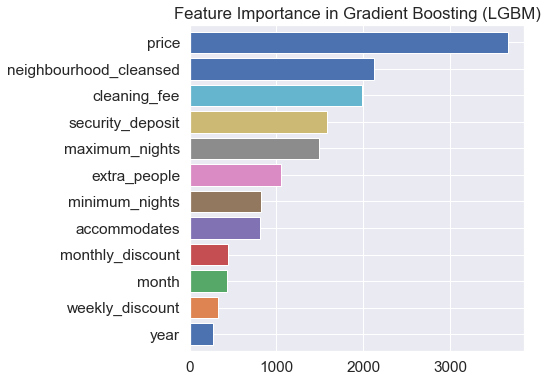

In [25]:
plt.figure(figsize=(6, 6));
pd.Series(lgb.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8);
plt.title('Feature Importance in Gradient Boosting (LGBM)');
plt.show();

original price is $ 119.0
original monthly revenue is $ 3570.0
model predicted monthly revenue is $ 3438.4338110558915
optimal monthly revenue is $ 5222.252027862896
optimized price is $ 199


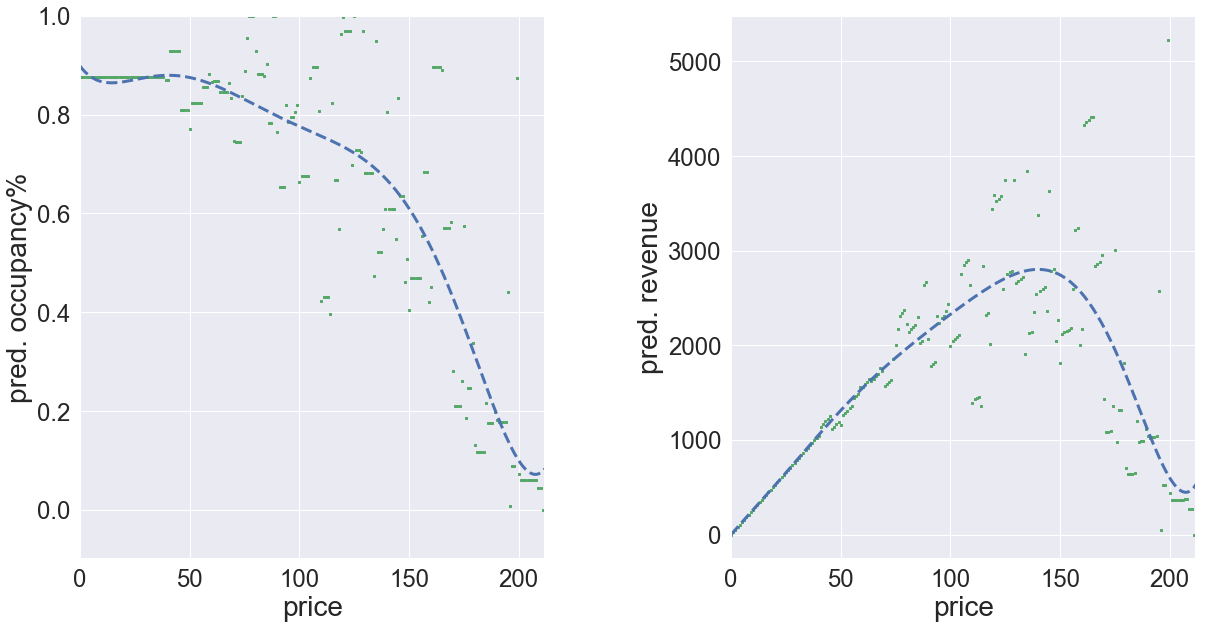

In [90]:
test_ID = 719

max_price = 500
price_range = range(0, max_price, 1)

x_in = pd.DataFrame(np.repeat(x_test.iloc[[test_ID]].values, max_price, axis=0))
x_in.columns = x_test.columns
x_in['price'] = pd.DataFrame(list(price_range)).iloc[:, 0]

pred_occupancy = lgb.predict(x_in)
pred_occupancy[pred_occupancy > 1] = 1 # ensure that occupancy% does not go above 100%
pred_occupancy[pred_occupancy < 0] = 0 # ensure that occupancy% does not go below 0%
pred_revenue = pred_occupancy*x_in['price']

# -------------------------polyfit-----------------------------
stop = next((i for i, x in enumerate(pred_occupancy) if x == 0), None) + 1
z_o = np.polyfit(range(0, stop, 1), pred_occupancy[0:stop], 6)
p_o = np.poly1d(z_o)
xp_o = np.linspace(0, stop, stop+1)

p_r = p_o
xp_r = xp_o
# -------------------------------------------------------------
print('original price is $', x_test['price'].iloc[test_ID])
print('original monthly revenue is $', x_test['price'].iloc[test_ID]*y_test.iloc[test_ID]*30)
print('model predicted monthly revenue is $', x_test['price'].iloc[test_ID]*y_pred_lgb[test_ID]*30)
print('optimal monthly revenue is $', pred_revenue.max()*30)
print('optimized price is $', np.argmax(pred_revenue))

f,axs=plt.subplots(1,2, figsize=(20,10))

axs[0].plot(price_range, pred_occupancy, 'gs',  markersize = 2, label='predicted results');
axs[0].plot(xp_o,p_o(xp_o), linewidth=3, linestyle='--', label='polyfit')
axs[0].set(xlim = (0, stop), ylim = (-0.1,1));
axs[0].set_xlabel('price', fontsize=28)
axs[0].set_ylabel('pred. occupancy%', fontsize=28)
axs[0].tick_params(axis="x", labelsize=24)
axs[0].tick_params(axis="y", labelsize=24)

axs[1].plot(price_range, pred_revenue*30, 'gs', markersize = 2);
axs[1].plot(xp_r,p_r(xp_r)*xp_r*30, linewidth=3, linestyle='--')
axs[1].set(xlim = (0, stop), xlabel = 'price', ylabel = 'revenue');
axs[1].set_xlabel('price', fontsize=28)
axs[1].set_ylabel('pred. revenue', fontsize=28)
axs[1].tick_params(axis="x", labelsize=24)
axs[1].tick_params(axis="y", labelsize=24)

# adjust the border width
for axis in ['top','bottom','left','right']:
    axs[0].spines[axis].set_linewidth(2)
    axs[1].spines[axis].set_linewidth(2)

f.subplots_adjust(wspace=0.4);

In [27]:
x_test.iloc[test_ID]

neighbourhood_cleansed    29.0  
accommodates              2.0   
price                     165.0 
security_deposit          200.0 
cleaning_fee              60.0  
extra_people              30.0  
minimum_nights            3.0   
maximum_nights            14.0  
month                     4.0   
year                      2018.0
weekly_discount           0.0   
monthly_discount          0.0   
Name: 15524, dtype: float64

In [28]:
%%time
# create final table
df_out = pd.DataFrame(columns=[
    'ori_price', 'ori_occup', 'ori_m_rev', 'pred_occup', 'pred_m_rev',
    'opt_price', 'opt_occup', 'opt_m_rev'
])

for test_ID in list(range(len(x_test))):
    max_price = int(x_test['price'].iloc[test_ID] * 2)
    price_range = range(0, max_price, 1)
    ori_price = x_test['price'].iloc[test_ID]
    ori_occupancy = y_test.iloc[test_ID]

    x_in = pd.DataFrame(
        np.repeat(x_test.iloc[[test_ID]].values, max_price, axis=0))
    x_in.columns = x_test.columns
    x_in['price'] = pd.DataFrame(list(price_range)).iloc[:, 0]

    pred_occupancy = lgb.predict(x_in)
    pred_occupancy[pred_occupancy >
                   1] = 1  # ensure that occupancy% does not go above 100%
    pred_occupancy[
        pred_occupancy < 0] = 0  # ensure that occupancy% does not go below 0%
    #     pred_revenue = pred_occupancy*x_in['price']

    z_o = np.polyfit(price_range, pred_occupancy, 6)
    p_o = np.poly1d(z_o)
    xp_o = np.linspace(0, max_price, max_price + 1)

    df_out = df_out.append(
        {
            'ori_price': ori_price,
            'ori_occup': ori_occupancy,
            'ori_m_rev': ori_price * ori_occupancy * 30,
            'pred_occup': p_o(ori_price),
            'pred_m_rev': ori_price * p_o(ori_price) * 30,
            'opt_price': np.argmax(xp_o*p_o(xp_o)),
            'opt_occup': p_o(xp_o).max(),
            'opt_m_rev': (xp_o*p_o(xp_o)).max() * 30
        },
        ignore_index=True)

Wall time: 1min 21s


In [29]:
df_out['diff_m_rev'] = df_out['opt_m_rev'] - df_out['ori_m_rev']
df_out['diff_m_rev%'] = df_out['diff_m_rev']/df_out['ori_m_rev']*100

# df_out = df_out[(df_out['ori_price'] > 0) & (df_out['ori_m_rev'] > 0)]
df_out.describe()
print(round((df_out['diff_m_rev%'][df_out['diff_m_rev%'] > 0].count()/df_out.shape[0])*100, 2), '% of users benifit from the tool')

,ori_price,ori_occup,ori_m_rev,pred_occup,pred_m_rev,opt_price,opt_occup,opt_m_rev,diff_m_rev,diff_m_rev%
count,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,171.016023,0.554454,2591.812343,0.486405,2167.094283,185.977289,0.888760,2805.960942,214.148599,117.113927
std,100.379499,0.352624,2249.498606,0.262399,1487.585499,117.388668,0.227327,1598.190878,1683.213840,390.915843
min,25.000000,0.005093,15.125000,-0.054680,-805.758603,27.000000,0.021290,38.899511,-10880.847717,-94.397622
25%,99.000000,0.231713,962.500000,0.266645,1159.979621,111.000000,0.753256,1773.780108,-551.652002,-17.905302
50%,145.000000,0.509259,2010.708333,0.475446,1896.999302,154.000000,0.977768,2472.885423,288.410908,15.220707
75%,220.000000,1.000000,3570.000000,0.696294,2751.492355,224.000000,1.041323,3422.308822,1129.188414,111.565050
max,500.000000,1.000000,15000.000000,1.054488,11282.008876,1000.000000,1.584729,15917.826253,13302.632109,10007.127800


60.12 % of users benifit from the tool


RMSE of occupany = 0.2616230017680441
R^2 of occupany = 0.4494612936604858
RMSE of monthly revenue = 1598.6557640372505
R^2 of monthly revenue = 0.4948748699295077
Wall time: 48.9 ms


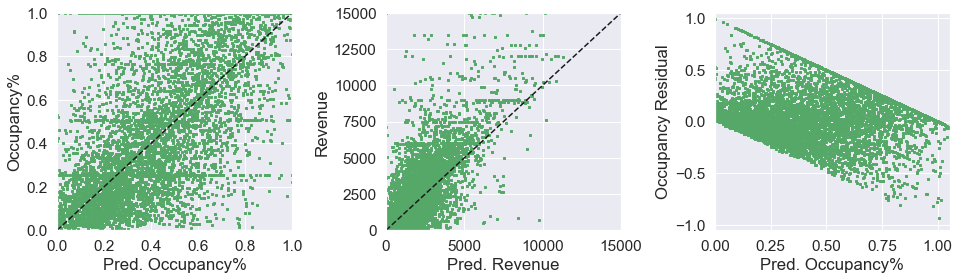

In [30]:
%%time
f, axs = plt.subplots(1, 3, figsize=(16,4))
f.subplots_adjust(wspace=0.4);

axs[0].plot(df_out['pred_occup'], df_out['ori_occup'], 'gs', markersize=2)
axs[0].set(xlim=(0, 1), ylim=(0, 1), xlabel='Pred. Occupancy%', ylabel='Occupancy%')
axs[0].plot([0, 1], [0, 1], 'k--')

axs[1].plot(df_out['pred_m_rev'], df_out['ori_m_rev'], 'gs', markersize=2)
axs[1].set(xlim=(0, df_out[['pred_m_rev', 'ori_m_rev']].max(axis=1).max()), ylim=(0, df_out[['pred_m_rev', 'ori_m_rev']].max(axis=1).max()), xlabel='Pred. Revenue', ylabel='Revenue')
axs[1].plot([0, df_out[['pred_m_rev', 'ori_m_rev']].max(axis=1).max()], [0, df_out[['pred_m_rev', 'ori_m_rev']].max(axis=1).max()], 'k--')

axs[2].plot(df_out['pred_occup'], (df_out['ori_occup'] - df_out['pred_occup']), 'gs', markersize=2)
axs[2].set(xlim=(0, df_out[['pred_occup', 'ori_occup']].max(axis=1).max()), ylim=(-df_out[['pred_occup', 'ori_occup']].max(axis=1).max(), df_out[['pred_occup', 'ori_occup']].max(axis=1).max()), xlabel='Pred. Occupancy%', ylabel='Occupancy Residual')


print('RMSE of occupany =', np.sqrt(mean_squared_error(df_out['ori_occup'], df_out['pred_occup'])))
print('R^2 of occupany =', r2_score(df_out['ori_occup'], df_out['pred_occup']))
print('RMSE of monthly revenue =', np.sqrt(mean_squared_error(df_out['ori_m_rev'], df_out['pred_m_rev'])))
print('R^2 of monthly revenue =',r2_score(df_out['ori_m_rev'], df_out['pred_m_rev']))

In [31]:
df_ben = df_out[df_out['diff_m_rev'] > 0]
print('For those who benifit')
print('gross revenue increase is', round((df_ben['diff_m_rev'].sum()/df_ben['ori_m_rev'].sum())*100, 2), '%')

print('25% of these users get', round(df_ben.describe().iloc[6,9], 2), '%+ monthly revenue increase')
print('50% of these users get', round(df_ben.describe().iloc[5,9], 2), '%+ monthly revenue increase')
print('75% of these users get', round(df_ben.describe().iloc[4,9], 2), '%+ monthly revenue increase')

For those who benifit
gross revenue increase is 77.9 %
25% of these users get 213.12 %+ monthly revenue increase
50% of these users get 79.08 %+ monthly revenue increase
75% of these users get 25.29 %+ monthly revenue increase
